<a href="https://colab.research.google.com/github/zachraaa/OULAD_Data_Analysis/blob/main/217_PreprocessingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [ ]:
listfiles = os.listdir('/content/drive/MyDrive/Semester 7/Analisis Big Data')
print(len(listfiles))
listfiles

7


['studentAssessment.csv',
 'studentRegistration.csv',
 'courses.csv',
 'studentInfo.csv',
 'studentVle.csv',
 'assessments.csv',
 'vle.csv']

# studentAssessment

Membaca dataset dengan menggunakan fungsi read_csv() yang kemudian dikonversi menjadi pandas dataframe.

In [ ]:
studentAssessment = pd.read_csv('/content/drive/MyDrive/Semester 7/Analisis Big Data/studentAssessment.csv')

Menampilkan 5 data teratas dari dataframe dengan menggunakan fungsi head().

In [ ]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


Menampilkan 5 data terbawah dari dataframe dengan menggunakan fungsi tail().

In [ ]:
studentAssessment.tail()

,id_assessment,id_student,date_submitted,is_banked,score
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0
173911,37443,558486,224,0,80.0


Menggunakan fungsi info() untuk mengetahui jumlah baris, kolom, dan tipe data dari atribut didalam dataframe. Dalam dataframe studentAssessment ini terdapat 173.912 baris data dengan jumlah kolom atau atribut sebanyak 5 kolom dengan tipe data int dan juga float.

In [ ]:
studentAssessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


Memeriksa keberadaan data duplikat dengan menggunakan fungsi duplicated() dan any(). Fungsi any() akan menghasilkan output boolean, true atau false. Jika outputnya true maka dalam dataframe tersebut terdapat data duplikat, begitu sebaliknya jika output berupa false maka dalam dataframe tidak terdapat data duplikat.

In [ ]:
studentAssessment.duplicated().any()

False

Memeriksa apakah ada data yang bersifat missing value dengan menggunakan fungsi isnull(). Fungsi sum() akan memberikan output jumlah data yang bersifat missing value.

In [ ]:
studentAssessment.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

Atribut score mempunyai 173 data yang bersifat missing value. Data tersebut perlu ditangani karena nantinya akan berpengaruh terhadap hasil akhir. Untuk menangani hal tersebut dilakukan pengisian terhadap data. Pertama mencari rata-rata dari atribut tersebut dengan menggunakan fungsi mean() kemudian mengisi datanya menggunakan fungsi fillna(). Menggunakan nilai rata-rata sebagai pengganti isi data yang memliki missing value karena untuk menghindari imbalance data.

In [ ]:
ratarata = studentAssessment['score'].mean()
studentAssessment['score'] = studentAssessment['score'].fillna(ratarata)
studentAssessment.isna().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

Menampilkan statistik deskriptif dari dataframe dengan menggunakan fungsi describe().

In [ ]:
studentAssessment.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173912.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.788755
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


# studentRegistration

Membaca dataset dengan menggunakan fungsi read_csv() yang kemudian dikonversi menjadi pandas dataframe.

In [ ]:
studentRegistration = pd.read_csv('/content/drive/MyDrive/Semester 7/Analisis Big Data/studentRegistration.csv')

Menampilkan 5 data teratas dari dataframe dengan menggunakan fungsi head().

In [ ]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


Menampilkan 5 data terbawah dari dataframe dengan menggunakan fungsi tail().

In [ ]:
studentRegistration.tail()

,code_module,code_presentation,id_student,date_registration,date_unregistration
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0
32592,GGG,2014J,2684003,-28.0,NaN


Menggunakan fungsi info() untuk mengetahui jumlah baris, kolom, dan tipe data dari atribut didalam dataframe. Dalam dataframe studentRegistration ini terdapat 32.593 baris data dengan jumlah kolom atau atribut sebanyak 5 kolom dengan tipe data int dan juga float.

In [ ]:
studentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


Memeriksa apakah ada data yang bersifat missing value dengan menggunakan fungsi isnull(). Fungsi sum() akan memberikan output jumlah data yang bersifat missing value.

In [ ]:
studentRegistration.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

Menghapus kolom date_rgistration dan juga date_unregistration karena jumlah data yang mempunyai missing value sangatlah banyak.

In [ ]:
del studentRegistration['date_registration']
del studentRegistration['date_unregistration']

Menampilkan statistik deskriptif dari dataframe dengan menggunakan fungsi describe().

In [ ]:
studentRegistration.describe()

,id_student
count,3.259300e+04
mean,7.066877e+05
std,5.491673e+05
min,3.733000e+03
25%,5.085730e+05
50%,5.903100e+05
75%,6.444530e+05
max,2.716795e+06


Memeriksa keberadaan data duplikat dengan menggunakan fungsi duplicated() dan any(). Fungsi any() akan menghasilkan output boolean, true atau false. Jika outputnya true maka dalam dataframe tersebut terdapat data duplikat, begitu sebaliknya jika output berupa false maka dalam dataframe tidak terdapat data duplikat.

In [ ]:
studentRegistration.duplicated().any()

False

# courses

Membaca dataset dengan menggunakan fungsi read_csv() yang kemudian dikonversi menjadi pandas dataframe.

In [ ]:
courses = pd.read_csv('/content/drive/MyDrive/Semester 7/Analisis Big Data/courses.csv')
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


Menggunakan fungsi info() untuk mengetahui jumlah baris, kolom, dan tipe data dari atribut didalam dataframe. Dalam dataframe courses ini terdapat 22 baris data dengan jumlah kolom atau atribut sebanyak 3 kolom dengan tipe data object dan int.

In [ ]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


Memeriksa apakah ada data yang bersifat missing value dengan menggunakan fungsi isnull(). Fungsi sum() akan memberikan output jumlah data yang bersifat missing value.

In [ ]:
courses.isnull().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

Menampilkan statistik deskriptif dari dataframe dengan menggunakan fungsi describe().

In [ ]:
courses.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


Memeriksa keberadaan data duplikat dengan menggunakan fungsi duplicated() dan any(). Fungsi any() akan menghasilkan output boolean, true atau false. Jika outputnya true maka dalam dataframe tersebut terdapat data duplikat, begitu sebaliknya jika output berupa false maka dalam dataframe tidak terdapat data duplikat.

In [ ]:
courses.duplicated().any()

False

Membuat bar plot pada atribut code_module untuk mengetahui banyaknya sebaran data dalam atribut tersebut.

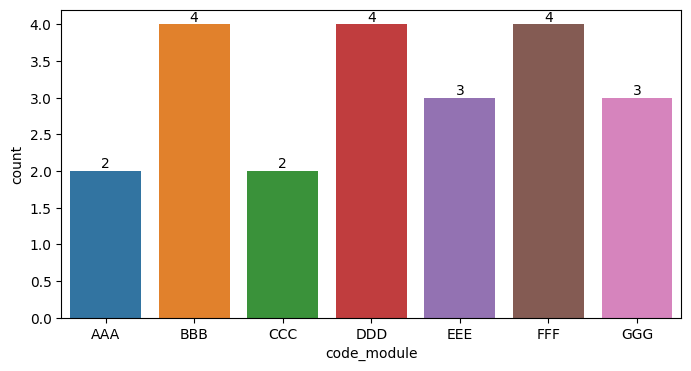

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=courses, x='code_module')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()
plt.close()

Membuat bar plot pada atribut code_presentation untuk mengetahui banyaknya sebaran data dalam atribut tersebut.

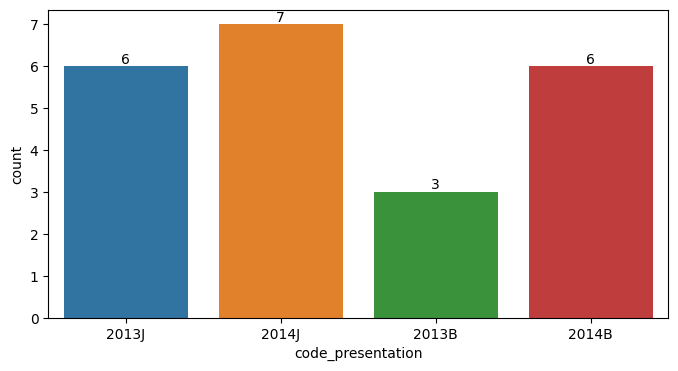

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=courses, x='code_presentation')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()
plt.close()

Membuat bar plot untuk menampilkan frekuensi kombinasi antara kolom code_module dan code_presentation. Hasil plot ini menunjukkan sebaran code_presentation dalam course_module.

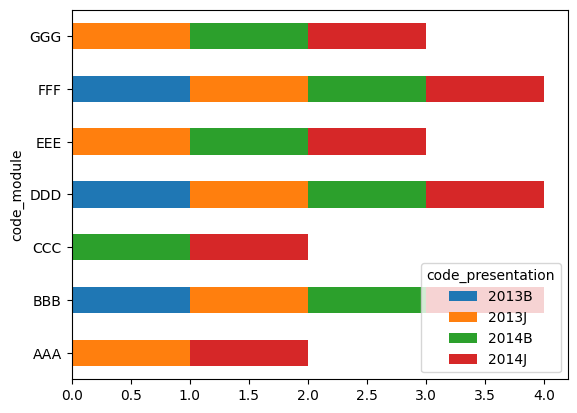

In [ ]:
pd.crosstab(courses.code_module, courses.code_presentation).plot.barh(stacked = True);

# studentInfo

Membaca dataset dengan menggunakan fungsi read_csv() yang kemudian dikonversi menjadi pandas dataframe.

In [ ]:
studentInfo = pd.read_csv('/content/drive/MyDrive/Semester 7/Analisis Big Data/studentInfo.csv')

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


Menampilkan 5 data teratas dari dataframe dengan menggunakan fungsi head().

In [ ]:
studentInfo.head()

,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,final_result,id_assessment,date_submitted,is_banked,score,code_module_y,code_presentation_y,assessment_type,date,weight
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,Pass,1752,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,Pass,1753,53,0,85.0,AAA,2013J,TMA,54.0,20.0
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,Pass,1754,115,0,80.0,AAA,2013J,TMA,117.0,20.0
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,Pass,1755,164,0,85.0,AAA,2013J,TMA,166.0,20.0
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,Pass,1756,212,0,82.0,AAA,2013J,TMA,215.0,30.0


In [ ]:
studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [ ]:
studentInfo.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [ ]:
studentInfo.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


Memeriksa keberadaan data duplikat dengan menggunakan fungsi duplicated() dan any(). Fungsi any() akan menghasilkan output boolean, true atau false. Jika outputnya true maka dalam dataframe tersebut terdapat data duplikat, begitu sebaliknya jika output berupa false maka dalam dataframe tidak terdapat data duplikat.

In [ ]:
studentInfo.duplicated().any()

False

Menampilkan distribusi imd_band dengan menggunakan barplot

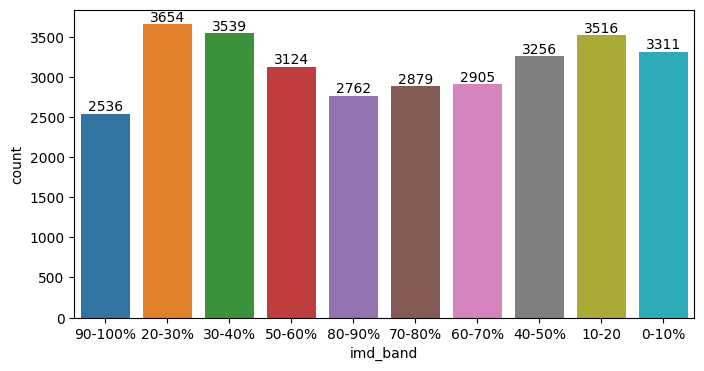

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=studentInfo, x='imd_band')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()
plt.close()

In [ ]:
modus = studentInfo['imd_band'].mode()[0]
studentInfo['imd_band'] = studentInfo['imd_band'].fillna(modus)
studentInfo.isna().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

Menampilkan distribusi gender dengan menggunakan barplot

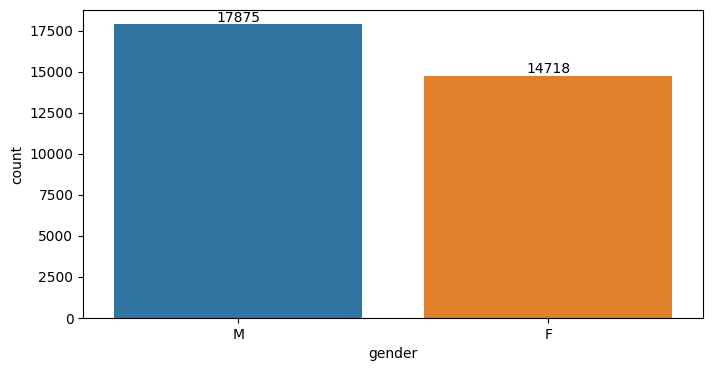

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=studentInfo, x='gender')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()
plt.close()

Menampilkan distribusi region dengan menggunakan barplot

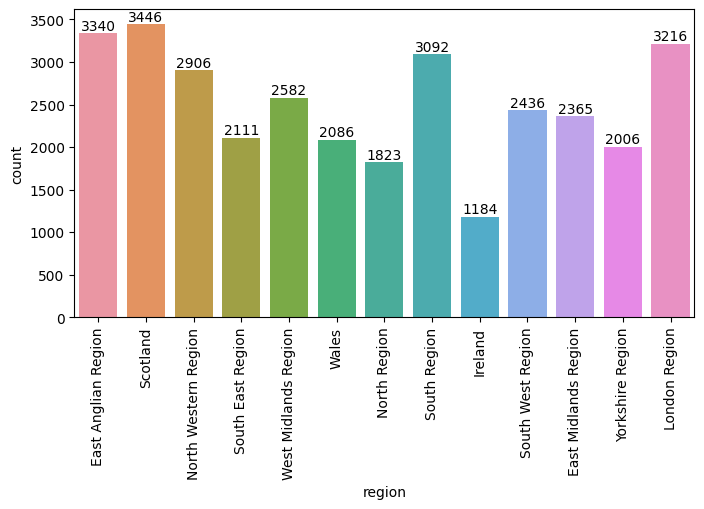

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=studentInfo, x='region')
ax.bar_label(ax.containers[0], label_type='edge')
plt.xticks(rotation=90)
plt.show()

Menampilkan distribusi highest_education dengan menggunakan barplot

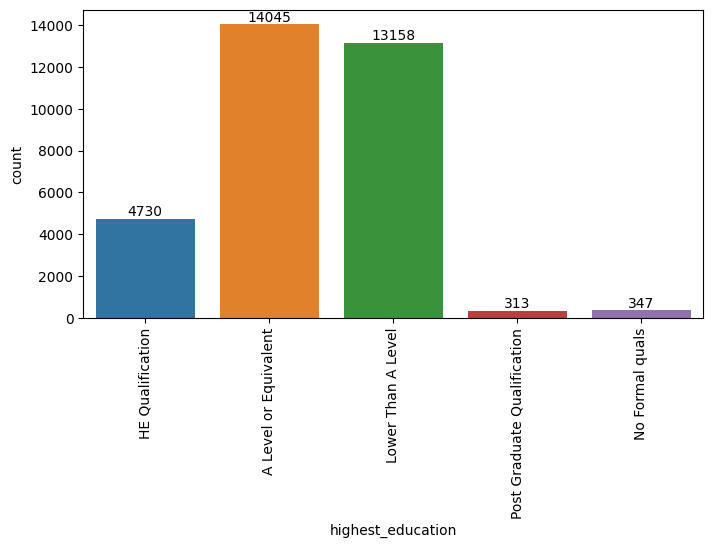

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=studentInfo, x='highest_education')
ax.bar_label(ax.containers[0], label_type='edge')
plt.xticks(rotation=90)
plt.show()

Menampilkan distribusi age_band dengan menggunakan barplot

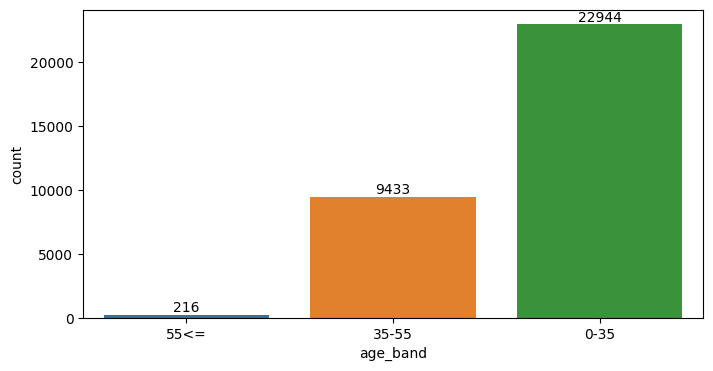

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=studentInfo, x='age_band')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

In [ ]:
Menampilkan distribusi final_result dengan menggunakan barplot

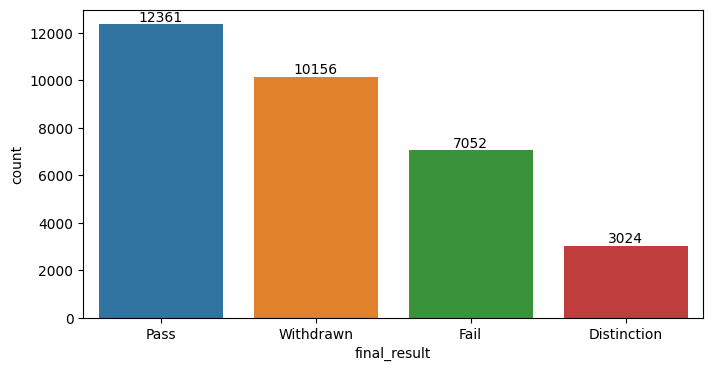

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=studentInfo, x='final_result')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

# assessments

Membaca dataset dengan menggunakan fungsi read_csv() yang kemudian dikonversi menjadi pandas dataframe.

In [ ]:
assessments = pd.read_csv('/content/drive/MyDrive/Semester 7/Analisis Big Data/assessments.csv')
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


Menggunakan fungsi info() untuk mengetahui jumlah baris, kolom, dan tipe data dari atribut didalam dataframe. Dalam dataframe assessments ini terdapat 206 baris data dengan jumlah kolom atau atribut sebanyak 6 kolom dengan tipe data object. float, dan int.

In [ ]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


Memeriksa apakah ada data yang bersifat missing value dengan menggunakan fungsi isnull(). Fungsi sum() akan memberikan output jumlah data yang bersifat missing value.

In [ ]:
assessments.isnull().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

Atribut date mempunyai 173 data yang bersifat missing value. Data tersebut perlu ditangani karena nantinya akan berpengaruh terhadap hasil akhir. Untuk menangani hal tersebut dilakukan pengisian terhadap data. Pertama mencari rata-rata dari atribut tersebut dengan menggunakan fungsi mean() kemudian mengisi datanya menggunakan fungsi fillna(). Menggunakan nilai rata-rata sebagai pengganti isi data yang memliki missing value karena untuk menghindari imbalance data.

In [ ]:
ratarata = assessments['date'].mean()
assessments['date'] = assessments['date'].fillna(ratarata)
assessments.isna().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64

Menampilkan statistik deskriptif dari dataframe dengan menggunakan fungsi describe().

In [ ]:
assessments.describe()

,id_assessment,date,weight
count,206.000000,206.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,73.933952,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,81.250000,0.000000
50%,25364.500000,147.500000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


Memeriksa keberadaan data duplikat dengan menggunakan fungsi duplicated() dan any(). Fungsi any() akan menghasilkan output boolean, true atau false. Jika outputnya true maka dalam dataframe tersebut terdapat data duplikat, begitu sebaliknya jika output berupa false maka dalam dataframe tidak terdapat data duplikat.

In [ ]:
assessments.duplicated().any()

False

# vle

Membaca dataset dengan menggunakan fungsi read_csv() yang kemudian dikonversi menjadi pandas dataframe.

In [ ]:
vle = pd.read_csv('/content/drive/MyDrive/Semester 7/Analisis Big Data/vle.csv')

Menampilkan 5 data teratas dari dataframe dengan menggunakan fungsi head().

In [ ]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [ ]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


Memeriksa keberadaan data duplikat dengan menggunakan fungsi duplicated() dan any(). Fungsi any() akan menghasilkan output boolean, true atau false. Jika outputnya true maka dalam dataframe tersebut terdapat data duplikat, begitu sebaliknya jika output berupa false maka dalam dataframe tidak terdapat data duplikat.

In [ ]:
vle.duplicated().any()

False

In [ ]:
vle.isnull().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [ ]:
ratarata = vle['week_from'].mean()
vle['week_from'] = vle['week_from'].fillna(ratarata)
ratarata = vle['week_to'].mean()
vle['week_to'] = vle['week_to'].fillna(ratarata)
vle.isna().sum()

id_site              0
code_module          0
code_presentation    0
activity_type        0
week_from            0
week_to              0
dtype: int64

In [ ]:
vle.describe()

,id_site,week_from,week_to
count,6.364000e+03,6364.000000,6364.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,3.688998,3.683519
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,15.204282,15.214987
50%,7.300965e+05,15.204282,15.214987
75%,8.140162e+05,15.204282,15.214987
max,1.077905e+06,29.000000,29.000000


In [ ]:
vle['activity_type'].value_counts()

resource          2660
subpage           1055
oucontent          996
url                886
forumng            194
quiz               127
page               102
oucollaborate       82
questionnaire       61
ouwiki              49
dataplus            28
externalquiz        26
homepage            22
ouelluminate        21
glossary            21
dualpane            20
repeatactivity       5
htmlactivity         4
sharedsubpage        3
folder               2
Name: activity_type, dtype: int64

# studentVle

Membaca dataset dengan menggunakan fungsi read_csv() yang kemudian dikonversi menjadi pandas dataframe.

In [ ]:
studentVle = pd.read_csv('/content/drive/MyDrive/Semester 7/Analisis Big Data/studentVle.csv')

Menampilkan 5 data teratas dari dataframe dengan menggunakan fungsi head().

In [ ]:
studentVle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [ ]:
studentVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


Memeriksa keberadaan data duplikat dengan menggunakan fungsi duplicated() dan any(). Fungsi any() akan menghasilkan output boolean, true atau false. Jika outputnya true maka dalam dataframe tersebut terdapat data duplikat, begitu sebaliknya jika output berupa false maka dalam dataframe tidak terdapat data duplikat.

In [ ]:
studentVle.duplicated().any()

True

In [ ]:
studentVle = studentVle.drop_duplicates()

In [ ]:
studentVle.duplicated().any()

False

In [ ]:
studentVle.isnull().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [ ]:
studentVle.describe()

,id_student,id_site,date,sum_click
count,9.868110e+06,9.868110e+06,9.868110e+06,9.868110e+06
mean,7.339467e+05,7.372334e+05,9.449918e+01,3.885553e+00
std,5.841796e+05,1.312501e+05,7.602741e+01,9.162606e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.067050e+05,6.735190e+05,2.400000e+01,1.000000e+00
50%,5.881250e+05,7.300540e+05,8.500000e+01,2.000000e+00
75%,6.464320e+05,8.770230e+05,1.560000e+02,4.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


# Merging All Data

Menggabungkan dataframe studentAssessments dan assessment menggunakan inner join berdasarkan kecocokan kolom id_assessment

In [ ]:
studentAssessment = studentAssessment.merge(assessments, how='inner', on='id_assessment')

Menggabungkan dataframe studentInfo dan studentAssessments menggunakan inner join berdasarkan kecocokan kolom id_student

In [ ]:
studentInfo = studentInfo.merge(studentAssessment, how = 'inner', on='id_student')

In [ ]:
studentInfo

,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,final_result,id_assessment,date_submitted,is_banked,score,code_module_y,code_presentation_y,assessment_type,date,weight
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,Pass,1752,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,Pass,1753,53,0,85.0,AAA,2013J,TMA,54.0,20.0
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,Pass,1754,115,0,80.0,AAA,2013J,TMA,117.0,20.0
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,Pass,1755,164,0,85.0,AAA,2013J,TMA,166.0,20.0
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,Pass,1756,212,0,82.0,AAA,2013J,TMA,215.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207314,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,...,Distinction,37437,169,0,60.0,GGG,2014J,TMA,173.0,0.0
207315,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,...,Distinction,37438,73,0,100.0,GGG,2014J,CMA,229.0,0.0
207316,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,...,Distinction,37439,150,0,60.0,GGG,2014J,CMA,229.0,0.0
207317,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,...,Distinction,37440,172,0,100.0,GGG,2014J,CMA,229.0,0.0


In [ ]:
studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207319 entries, 0 to 207318
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   code_module_x         207319 non-null  object 
 1   code_presentation_x   207319 non-null  object 
 2   id_student            207319 non-null  int64  
 3   gender                207319 non-null  object 
 4   region                207319 non-null  object 
 5   highest_education     207319 non-null  object 
 6   imd_band              207319 non-null  object 
 7   age_band              207319 non-null  object 
 8   num_of_prev_attempts  207319 non-null  int64  
 9   studied_credits       207319 non-null  int64  
 10  disability            207319 non-null  object 
 11  final_result          207319 non-null  object 
 12  id_assessment         207319 non-null  int64  
 13  date_submitted        207319 non-null  int64  
 14  is_banked             207319 non-null  int64  
 15  

In [ ]:
studentInfo.duplicated().any()

False

Menampilan frekuensi kombinasi antara kolom region dan final result

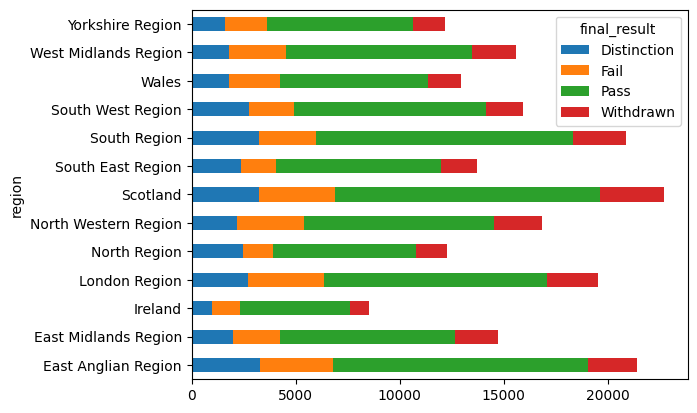

In [ ]:
pd.crosstab(studentInfo.region, studentInfo.final_result).plot.barh(stacked = True);

Menampilkan distribusi score berdasarkan final_result

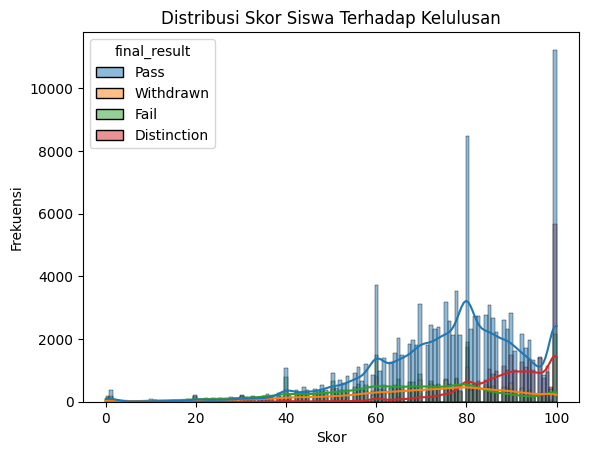

In [ ]:
sns.histplot(data=studentInfo, x='score', hue='final_result', kde=True)
plt.xlabel('Skor')
plt.ylabel('Frekuensi')
plt.title('Distribusi Skor Siswa Terhadap Kelulusan')
plt.show()